In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import simple_LinearRegression as SLR

In [47]:
# Get the data which need to predict
df = pd.read_csv("csv_file.csv")

In [48]:
# Splitting the DataFrame into training and testing sets with a 70-30 split ratio
# and specifying a random seed for reproducibility
train, test = train_test_split(df, test_size = 0.3, random_state=40)

# Split the data again to simplify the problem with curr practice
x_train = train[["Temperature"]]
y_train = train[["Wind_Speed"]]

x_test = test[["Temperature"]]
y_test = test[["Wind_Speed"]]

"""
x_train = train["Profit"]:
-This line of code assigns the column "Profit" from your train dataset to the variable x_train.
-The result is a Pandas Series containing the values of the "Profit" column.
-x_train will be a 1D array-like object.

x_train = train[["Profit"]]:
-This line of code assigns a DataFrame containing a single column, "Profit," from your train dataset to the variable x_train.
-The result is a Pandas DataFrame with one column.
-x_train will be a 2D DataFrame.
"""


'\nx_train = train["Profit"]:\n-This line of code assigns the column "Profit" from your train dataset to the variable x_train.\n-The result is a Pandas Series containing the values of the "Profit" column.\n-x_train will be a 1D array-like object.\n\nx_train = train[["Profit"]]:\n-This line of code assigns a DataFrame containing a single column, "Profit," from your train dataset to the variable x_train.\n-The result is a Pandas DataFrame with one column.\n-x_train will be a 2D DataFrame.\n'

In [49]:
# Create Linear Regression model
model = LinearRegression()

# Fit model to data
model.fit(x_train, y_train)

# Prediction
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(-1, 1)
print(y_pred)

[[3.06310856]
 [3.79236854]
 [2.93713275]
 ...
 [3.46623116]
 [2.53401015]
 [3.39904406]]


In [50]:
"""Manual"""
# Handle arguments
x_trainM = x_train.values
y_trainM = y_train.values

x_testM = x_test.values
y_testM = y_test.values

# Compute coeficient
model_Manual = SLR.compute_CoefficientModel(x_trainM, y_trainM)

# Predicttion
y_predManual = SLR.predict_LableModel(x_testM, model_Manual)

print(y_predManual)

[[3.06310856]
 [3.79236854]
 [2.93713275]
 ...
 [3.46623116]
 [2.53401015]
 [3.39904406]]


In [51]:
print(y_pred - y_predManual)

[[-1.06581410e-14]
 [-6.21724894e-15]
 [-1.11022302e-14]
 ...
 [-7.99360578e-15]
 [-1.28785871e-14]
 [-7.99360578e-15]]


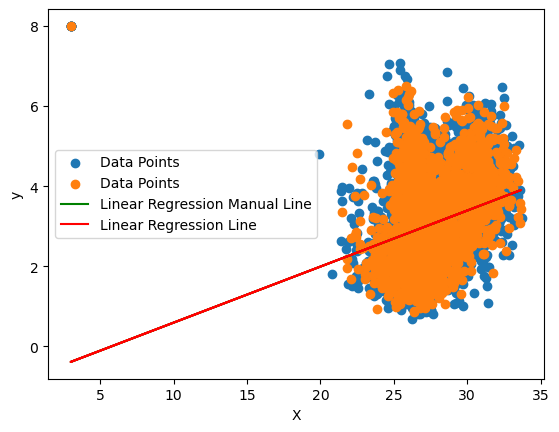

In [54]:
# Plot the data points and regression line
plt.scatter(x_train, y_train, label="Data Points")
plt.scatter(x_test, y_test, label="Data Points")
plt.plot(x_test["Temperature"].values.reshape(-1, 1), y_predManual, color='green', label="Linear Regression Manual Line")
plt.plot(x_test["Temperature"].values.reshape(-1, 1), y_pred, color='red', label="Linear Regression Line")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [22]:
# Compute cost
# Calculate the Mean Squared Error (MSE) as the cost
mse = mean_squared_error(y_test["R&D Spend"].values.reshape(-1, 1)/1000, y_pred/1000)

# Print the MSE (cost)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 186.16204916630588


In [24]:

# Assuming y_true contains the true values and y_pred contains the predicted values
r_squared = r2_score(y_test["R&D Spend"].values.reshape(-1, 1), y_pred)

# Print the R-squared value
print("R-squared:", r_squared)


R-squared: 0.9264746135766566
